# Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read Data

In [10]:
points = pd.read_excel('15-Points.xlsx')

points.shape

(15, 3)

In [11]:
points.head()

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5


# Nearest Neighbor Algorithm

In [12]:
def nearest_neighbor(start_point_index=0, points=None):
    
    # Read default points if user didn't entered input
    if points is None:
        points = pd.read_excel('15-Points.xlsx')

    visited = np.array([False] * len(points))
    path = []

    current_city = start_point_index
    distances = []

    path.append(current_city)
    visited[0] = True

    while visited.sum() != len(points):
    
        # get euclidean distance matrix
        distance_matrix = np.linalg.norm(points.values[current_city][:2] - points.values[:, :2], axis=1)

        distance_matrix[current_city] = np.inf

        # get nearest city
        while True:
            nearest_city = np.argmin(distance_matrix)
            
            if not visited[nearest_city]:
                current_city = nearest_city
                break
            
            distance_matrix[nearest_city] = np.inf    
        
        distances.append(distance_matrix[nearest_city])
        path.append(nearest_city)
        visited[current_city] = True

    path.append(start_point_index)
    distances.append(np.linalg.norm(points.values[start_point_index][:2] - points.values[path[-1], :2]))
    return distances, path

# Visualization

- *Interactive Visualization using matplotlib*

In [13]:
# QT backend
%matplotlib qt

# Toggle fullscreen mode for all plots
plt.rcParams['figure.figsize'] = [12, 8]

# Initialize figure
plt.plot([], [])
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Get user input
points = []
while True:
    input = plt.ginput(1)
    if not input:
        # plt.close()
        break

    points.append(input[0])
    plt.scatter(input[0][0], input[0][1], color='C0')
    plt.pause(0.01)


# Cities numbers
for i in range(len(points)):
    points[i] = list(points[i]) + [i+1]

# Create DataFrame
points = pd.DataFrame(points, columns=['x', 'y', 'City'])

# Get PATH
distances, path = nearest_neighbor(start_point_index=0, points=points)

# Separate Xs, Ys, Cities in different variables
Xs, Ys = points.values[path][:, 0], points.values[path][:, 1]
cities_name = list(map(lambda x: 'City '+x, list((points.values[path][:, 2]).astype('int').astype('str'))))

# Visualization
plt.scatter(Xs, Ys, color='C0')
for i in range(len(Xs[:-1])):
    plt.text(Xs[i], Ys[i]+0.3, f'{cities_name[i]}', ha='center')

for i in range(2, len(Xs)+1):
    plt.pause(0.5)
    plt.plot(Xs[:i], Ys[:i], color='C0')
    plt.title("Total Distance: {:.2f}".format(sum(distances[:i-1])))

# Wait 2 second before closing window
plt.pause(2)
plt.close()

In [14]:
print(Xs)
print()
print(Ys)
print()
print(cities_name)
print()
print(path)

[-4.64884523 -2.89189062 -2.00396732  2.13337741  1.98224153 -4.64884523]

[ 6.02282111 -0.09533819 -4.82471286 -1.89700473  4.18361985  6.02282111]

['City 1', 'City 5', 'City 4', 'City 3', 'City 2', 'City 1']

[0, 4, 3, 2, 1, 0]


- *Visualization using matplotlib (Static Figure)*

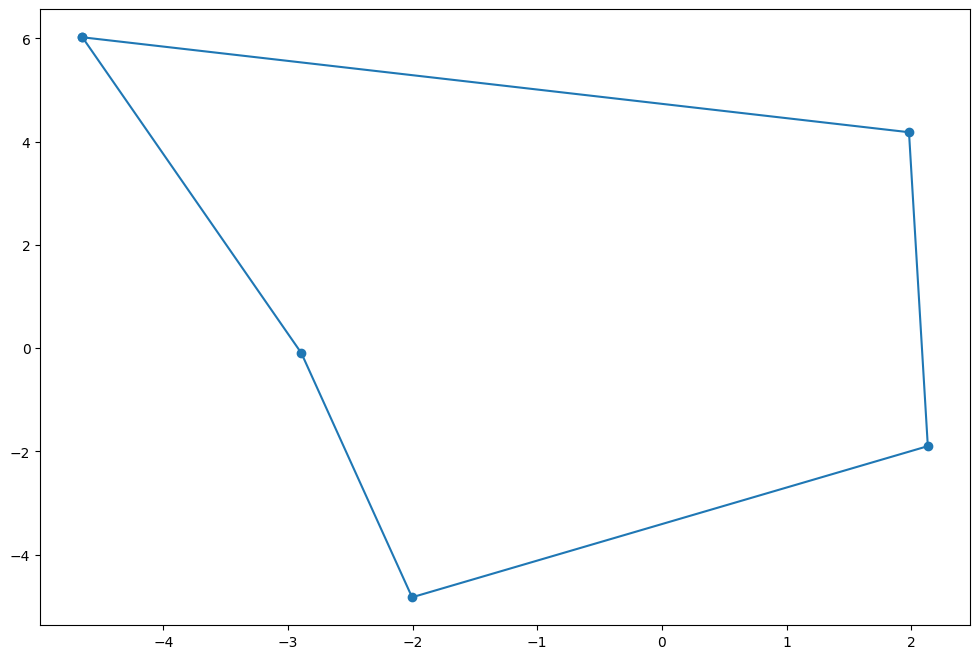

In [15]:
%matplotlib inline

_ = plt.plot(Xs, Ys, 'o-')
plt.show()

- *Visualization using Plotly*

In [16]:
px.line(x=Xs, y=Ys, hover_name=cities_name, markers=True)